In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 29 09:08:17 2017

@author: luxihan
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#problem 1
def create_sereis():
    entry = [-3] * 5
    index = [(i + 1) * 2 for i in range(5)]
    const_array = pd.Series(entry, index = index)
    
    name_dict = {'Bill': 31, 'Sarah': 28, 'Jane': 34, 'Joe': 26}
    dict_array = pd.Series(name_dict)
    return const_array, dict_array

def create_random_walk():
    random.seed(12345)
    for i in range(5):
        N = 1000 # length of random walk
        s = np.zeros(N)
        s[1:] = np.random.binomial(1, .5, size=(N-1,))*2-1 #coin flips
        s = pd.Series(s)
        s = s.cumsum() # random walk
        s.plot(label = 'Random Walk {}'.format(i + 1))
        plt.ylim([-50, 50])
        plt.legend(loc='upper right')
    
    N = 1000 # length of random walk
    s = np.zeros(N)
    s[1:] = np.random.binomial(1, .51, size=(N-1,))*2-1 #coin flips
    s = pd.Series(s)
    s = s.cumsum() # random walk
    s.plot(label = 'Non Random Walk {}'.format(i + 1), color = 'k')
    plt.ylim([-50, 50])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Random Walk Plot')
    plt.show()
    plt.close
    
#Problem 3
def operate_sql(data):
    rv_data = data[(data.Age > 19) & (data.Sex == 'M')][['ID', 'Name']]
    return rv_data
    
    

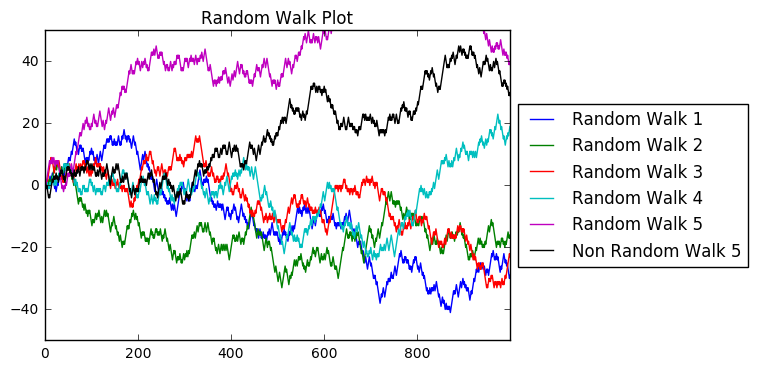

   ID   Name
0   0  Mylan
6   6   Matt


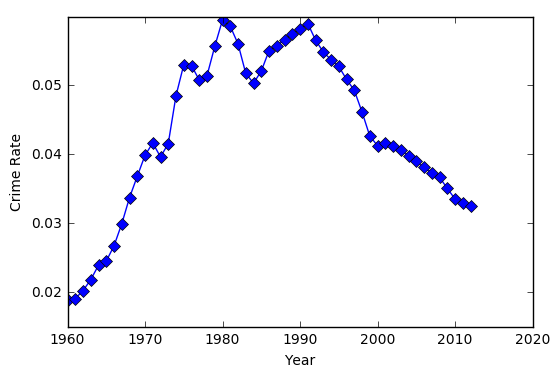

      Population     Total  Violent  Property  Murder  Forcible-Rape  Robbery  \
Year                                                                            
1960   179323175   3384200   288460   3095700    9110          17190   107840   
1961   182992000   3488000   289390   3198600    8740          17220   106670   
1962   185771000   3752200   301510   3450700    8530          17550   110860   
1963   188483000   4109500   316970   3792500    8640          17650   116470   
1964   191141000   4564600   364220   4200400    9360          21420   130390   
1965   193526000   4739400   387390   4352000    9960          23410   138690   
1966   195576000   5223500   430180   4793300   11040          25820   157990   
1967   197457000   5903400   499930   5403500   12240          27620   202910   
1968   199399000   6720200   595010   6125200   13800          31670   262840   
1969   201385000   7410900   661870   6749000   14760          37170   298850   
1970   203235298   8098000  

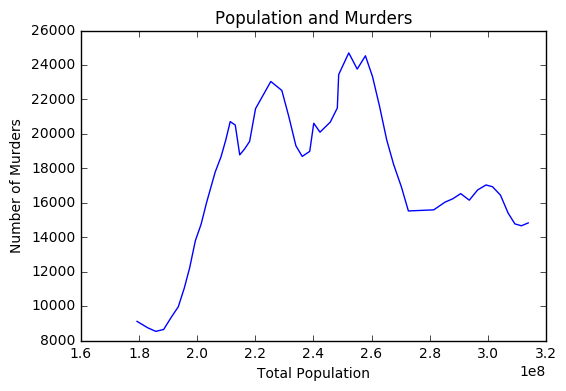

In [9]:
if __name__ == '__main__':
    #Problem 2
    create_random_walk()
    
    #build toy data for SQL operations
    name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', \
                'Alexander', 'JeanMarie']
    sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
    age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
    rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
    ID = range(9)
    aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
    GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
    mathID = [0, 1, 5, 6, 3]
    mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
    major = ['y', 'n', 'y', 'n', 'n']
    studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, \
                                'Class': rank})
    otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
    mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})
    
    rv_data = operate_sql(studentInfo)
    print(rv_data)
    
    #Problem 4
    rv_data = pd.merge(studentInfo, otherInfo, on = 'ID', how = 'outer')\
                      [studentInfo.Sex == 'M'][['ID', 'Age', 'GPA']]
    
    #Problem 5
    raw_data = pd.read_csv('crime_data.txt', skiprows = 0,\
                           header = 1, index_col = 'Year')
    raw_data['crime_rate'] = raw_data['Total'] / raw_data['Population']
    
    #plot the crime rate in year
    plt.plot(raw_data['crime_rate'], marker = 'D')
    plt.xlabel('Year')
    plt.ylabel('Crime Rate')
    plt.show()
    
    #sort crime rate
    sorted = raw_data['crime_rate'].sort_values(ascending = False)[:5]
    
    avg_crime = \
    raw_data.loc[1960:2013, 'Total'].mean()
    
    avg_bug = \
    raw_data.loc[1960 : 2013, 'Burglary'].mean()
    
    #find below and above
    below = raw_data[raw_data.Total <= avg_crime]
    print(below)
    
    above = raw_data[raw_data.Burglary >= avg_bug]
    print(above)
    
    #plot murder
    plt.plot(raw_data['Population'], raw_data['Murder'])
    plt.xlabel('Total Population')
    plt.ylabel('Number of Murders')
    plt.title('Population and Murders')
    plt.show()
    
    #smaller datg set
    smaller = raw_data.loc[1980:1990, ['Population', 'Robbery', 'Violent']]
    

As we can see, the non-random walk plot has an upward trend. For the other plot, the plot doesn't have a particularly homogeneous trend. 